## Algorithm to be executed after I get the values:

In [29]:
import kmeanspp
from numpy import *
import matplotlib.pyplot as plt
dataMat = kmeanspp.loadDataSet('testSet.txt')

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA-vecB,2)))

          
def createCent(dataSet, K,sampling_factor=2):
    '''
        Parameters:
        -----------
        
        dataSet: numpy.matrix
        K: integer, number of clusters
        sampling_factor: integer
    
    '''
      #let dataSet be an array of arrays  
    elected_centers = []
    candidate_centers = []
    if type(dataSet) == mat:
		dataSet = dataSet.A
    else:
		dataSet = array(dataSet)
    #initialize 2-d mat with first center selected arbitrarily
    candidate_centers.append(dataSet[0, :].tolist())
    
    #find the nearest distance to the closest centers in candidate_centers
    Dx = array([min([distEclud(c, array(x)) for c in candidate_centers]) for x in dataSet])
    psi = sum(Dx)
    l = int(ceil(log(psi)))
    
    #This is to avoid recalculation of Dx and psi one time
    count = True

    for k in range(l):
        
        if count:			
			Dx = array([min([distEclud(c, array(x)) for c in candidate_centers]) for x in dataSet])
			psi = sum(Dx)
        else:
			count = False
        r_points = random.random_sample((sampling_factor, ))
        probs = (sampling_factor * Dx)/psi
        cumsumprobs = cumsum(probs)
      
        # parallel job start
        for r in r_points: 
            for j,p in enumerate(cumsumprobs):
                if r < p:
                    i = j
                    break       
            candidate_centers.append(dataSet[i, :].tolist())
            dataSet = delete(dataSet, i, axis = 0)        
        #parallel job stop
        
    w = [0 for _ in range(len(candidate_centers))]
    for i in range(len(dataSet)):
        minDist = inf
        for j,c in enumerate(candidate_centers):
                dist = distEclud(c, array(dataSet[i]))
                if dist < minDist:
                    minDist = dist
                    index = j
        w[index]+=1
        

    w = array(w)    
    probs = w/float(sum(w))
    cumsprobs = cumsum(probs)
        
    # select k-centers according to our algorithm
    # here I assign random values to remaining batteries and type of sensors    
    
    sensor_type = random.randint(2,size=len(w))
    
    remaining_power = random.uniform(size=len(w))
    
    for k in range(K):
        r = random.rand()
        for j,p in enumerate(cumsprobs):
            
            new_p = (abs(p - sensor_type[j] + remaining_power[j]))%(.99)
            if r < new_p and candidate_centers[j] not in elected_centers:
                index = j
                elected_centers.append(candidate_centers[index])
                break

    print Dx           
    return elected_centers
    
centers = createCent(dataMat,K=3,sampling_factor=3)


[ 0.          1.25071572  0.37776157  2.83410571  0.16423354  1.39183405
  1.15030741  0.3384782   1.63498154  0.53613748  1.34904032  1.00282588
  0.68799642  0.87141174  1.17651522  0.45282938  0.57018889  0.4490498
  0.93403718  0.89072027  0.70666304  1.00609727  0.31861903  0.58602082
  0.45724112  1.31412177  0.89194314  0.22668372  0.19891958  0.19225883
  0.69728449  1.35401413  0.89775851  1.20279012  2.19071402  1.33440801
  0.33363332  0.79137521  0.40837551  0.49302807  1.09415652  0.60954437
  0.922269    0.44313757  0.32975408  0.68627679  1.32755288  0.80823909
  1.03712412  0.13566247  0.90663904  0.43764938  0.27734668  0.92825355
  1.59759968  0.15068809  1.42127889  0.42442383  1.32537417  0.75337841
  0.71049029  0.65440587]


In [30]:
# now calculate distance from each node and assign that node to that center
def leader_assignment(dataMat,K=3,sampling_factor=3):
    centers = createCent(dataMat,K,sampling_factor)
    center_assigned = []
    for i,x in enumerate((dataMat)):
        minDis = inf
        for j,c in enumerate((centers)):
            dis = distEclud(c, array(x))
            if dis<minDis:
                minDis = dis
                index = j
        center_assigned.append(index)
    return centers,center_assigned

In [31]:
centers,cluster_assigned = leader_assignment(dataMat)
print cluster_assigned

[ 0.          0.57018889  2.06077282  1.52434605  0.37776157  0.68002405
  1.97115994  0.53613748  1.32268987  0.3384782   0.42149238  0.42931969
  0.74063061  1.07895128  0.56840459  1.2992701   0.45282938  0.4490498
  0.93403718  0.89072027  0.70666304  0.64414662  0.5923675   0.58602082
  0.45724112  1.31412177  1.29286477  0.22668372  0.48144322  0.49846512
  1.39865268  1.30476098  0.89775851  1.480686    2.29648514  1.33440801
  0.33363332  0.63803168  0.40837551  0.49302807  1.09415652  0.60954437
  0.91724544  0.44313757  0.80525299  0.96524332  1.70099285  0.80823909
  0.65966333  0.13566247  1.3099709   0.43764938  0.27734668  1.20440079
  1.43601081  0.15068809  1.76548924  0.81382137  1.46451503  0.75337841
  0.94854277  1.508056  ]
[0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 2]


[[1.658985, 4.285136], [2.190101, -1.90602], [-2.123337, 2.943366]]
cluster: [0 2 1 2 0 2 1 2 0 2 1 1 0 2 1 1 0 2 1 2 0 2 1 1 0 2 1 1 0 2 1 2 0 2 1 1 0
 2 1 1 0 2 1 1 0 2 1 2 0 2 1 1 0 2 1 2 0 2 1 1 0 2 1 1 0 2 1 1 0 2 1 2 1 2
 1 1 0 2 1 2]


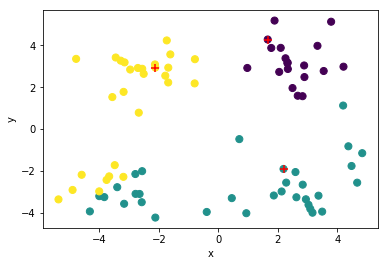

In [32]:
x = mat(dataMat)[:,0]
y = mat(dataMat)[:,1]
Cluster = np.array(cluster_assigned)
print centers
print 'cluster:',Cluster
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=Cluster,s=50)
#s parameter shows how big will be the plus symbol

centers = np.mat(centers) 
for ele in centers:
    i = ele[0,0]
    j = ele[0,1]
    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()


In [40]:
data = {}
data["centers"] = centers.A.tolist()
data["cluster_assigned"] = cluster_assigned
data["dataMat"] = dataMat
import json
with open('/home/master/Desktop/main_json.txt','w+') as outfile:
    json.dump(data,outfile)

print data

{'dataMat': [[1.658985, 4.285136], [-3.453687, 3.424321], [4.838138, -1.151539], [-5.379713, -3.362104], [0.972564, 2.924086], [-3.567919, 1.531611], [0.450614, -3.302219], [-3.487105, -1.724432], [2.668759, 1.594842], [-3.156485, 3.191137], [3.165506, -3.999838], [-2.786837, -3.099354], [4.208187, 2.984927], [-2.123337, 2.943366], [0.704199, -0.479481], [-0.39237, -3.963704], [2.831667, 1.574018], [-0.790153, 3.343144], [2.943496, -3.357075], [-3.195883, -2.283926], [2.336445, 2.875106], [-1.786345, 2.554248], [2.190101, -1.90602], [-3.403367, -2.778288], [1.778124, 3.880832], [-1.688346, 2.230267], [2.592976, -2.054368], [-4.007257, -3.207066], [2.257734, 3.387564], [-2.679011, 0.785119], [0.939512, -4.023563], [-3.674424, -2.261084], [2.046259, 2.735279], [-3.18947, 1.780269], [4.372646, -0.822248], [-2.579316, -3.497576], [1.889034, 5.1904], [-0.798747, 2.185588], [2.83652, -2.658556], [-3.837877, -3.253815], [2.096701, 3.886007], [-2.709034, 2.923887], [3.367037, -3.184789], [-2.1